<a href="https://colab.research.google.com/github/Mayank2109/UTS_ML2019_ID13335649/blob/master/Assign2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Property investment has increased simultaneously with the growth of the population that requires everyone to buy a house. This affects the house prices increase significantly every year. Hence, it is essential to predict house prices in the future. As a property company, they are able to determine the selling price of the house, while the customer can arrange the right time to purchase a house. It is also beneficial for property investors to understand the trend of housing prices in a certain location. Machine learning technique can be used to solve this problem by finding the patterns to gain insights with unerringly accurate price prediction.
The housing sale dataset comprises the sale of individual residential property in Ames, Lowa from 2006 to 2010 from Kaggle. Using the dataset, the house price can be forecasted based on the combination of several variables. The problem (price prediction) refers to supervised machine learning when the input and output variables clearly given. With the function of input variables, the simple algorithm, linear regression identifies every variable to obtain the optimal accuracy output of house prices. The algorithm is based on linear approach to modeling the relationship between the dependent and independent variables. Instead of simple linear progression implementation, ridge regression and Lasso Regression are implemented to fix underfitting and noisy on linear progression. Ridge Regression can perform on the variation of linear progression. Using this method tends to shrink the coefficient between independent variables. However, Lasso Regression is less likely to perform better in the coefficient. These methods are able to handle.

# 2. Exploration

## 2.1 Understanding The Dataset

It is essential to understand the specifics of dataset. There are two datasets, train and test data. Both of the data are identified the type of variables and finding the relation between them. The train data set contains 1460 rows with 81 column, while test data set 1459 with 80 columns. Both datasets have 80 similar variables or attributes comprising 37 numerical and 43 categorical variables. The training dataset has target variable variable i.e. SalePrice which needs to be prediced based on  80 attributes. The dataset will undergo through various changes and finally it would be utilized to build appropriate machine learning models.
 





In [0]:
# Import library for Data and plotting
import pandas as pd
import numpy as np
import seaborn as sns

# Statistical Libraries
from scipy.stats import skew, norm
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, LassoLarsCV, Ridge
from sklearn import metrics
 
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
 

from sklearn.metrics import mean_squared_error,make_scorer
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler
from plotly import tools
try:
    import plotly.graph_objects as go
except:
    !pip install plotly==4.1.0
import plotly
from plotly import tools
 

Cloning the github, then it can be accessed the files under the whole repository without saving them into google drive.

In [0]:
!git clone https://github.com/ainnoun/UTS_ML_2019_ID13317464.git

fatal: destination path 'UTS_ML_2019_ID13317464' already exists and is not an empty directory.


Reading the train.csv and test.csv file from repository

In [0]:
import os
path = '/content/UTS_ML_2019_ID13317464'
training = pd.read_csv(os.path.join(path, "train.csv"))
testing = pd.read_csv(os.path.join(path, "test.csv"))


In [0]:
id_train = training['Id']
id_test = testing['Id']

training.drop("Id", axis = 1, inplace = True)
testing.drop("Id", axis = 1, inplace = True)



Initially, in our dataset, all the variables (attributes) are analyzed using the pandas describe method that displays various statistical information (mean, percentile, standard deviation, etc) of all the attributes

In [0]:
training.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
ntrain = training.shape[0]
ntest = testing.shape[0]
 
#Combining training data and testing data then saving it in the new object (total_data)
total_dataset = pd.concat((training, testing)).reset_index(drop=True)
total_dataset.drop(['SalePrice'], axis=1, inplace=True)
print("Total data is : {}".format(total_dataset.shape))
 

Total data is : (2919, 79)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




## 2.2 Cleaning Data for Training and Testing Data

Identifying the missing values in attributes of dataset.

In [0]:
#Identifying the missing values of every variable in percentage
total_dataset_na = (total_dataset.isnull().sum() / len(total_dataset)) * 100
total_dataset_na = total_dataset_na.drop(total_dataset_na[total_dataset_na == 0].index).sort_values(ascending=False)[:30]
data_missing = pd.DataFrame({'Missing Ratio' :total_dataset_na})

data_missing.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


To handle all the missing values of attributes, necessary steps are performed where null values of categorical attributes are treated accordingly and numerical attributes are replaced with mean, median or mode of attribute depending on the attribute’s properties. 

In [0]:
#handling missing values for categorial variables with NA refering to none
total_dataset["Alley"] = total_dataset["Alley"].fillna("None")
total_dataset["Fence"] = total_dataset["Fence"].fillna("None")
total_dataset["FireplaceQu"] = total_dataset["FireplaceQu"].fillna("None")
total_dataset["PoolQC"] = total_dataset["PoolQC"].fillna("None")
total_dataset["MiscFeature"] = total_dataset["MiscFeature"].fillna("None")

for col in ('BsmtQual','BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtExposure'):
    total_dataset[col] = total_dataset[col].fillna('None')
for col in ('GarageFinish', 'GarageQual','GarageType','GarageCond'):
    total_dataset[col] = total_dataset[col].fillna('None')
total_dataset["MasVnrType"] = total_dataset["MasVnrType"].fillna("None")

    
#handling missing values for categorical variables with NA meaning 'typical'
total_dataset["Functional"] = total_dataset["Functional"].fillna("Typ")

#handling missing values for categorical variables by replacing with mode
total_dataset['Electrical'] = total_dataset['Electrical'].fillna(total_dataset['Electrical'].mode()[0])
total_dataset['KitchenQual'] = total_dataset['KitchenQual'].fillna(total_dataset['KitchenQual'].mode()[0])
total_dataset['Exterior1st'] = total_dataset['Exterior1st'].fillna(total_dataset['Exterior1st'].mode()[0])
total_dataset['Exterior2nd'] = total_dataset['Exterior2nd'].fillna(total_dataset['Exterior2nd'].mode()[0])
total_dataset['SaleType'] = total_dataset['SaleType'].fillna(total_dataset['SaleType'].mode()[0])
total_dataset['MSZoning'] = total_dataset['MSZoning'].fillna(total_dataset['MSZoning'].mode()[0])

#handling missing values for nominal variables with NA refering to none
total_dataset['MSSubClass'] = total_dataset['MSSubClass'].fillna("None")                                            

#handling missing values for nominal variables (float64) with median
total_dataset["LotFrontage"] = total_dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#handling missing values for nominal variables (int64) with '0'
for col in ('TotalBsmtSF', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','BsmtHalfBath'):
    total_dataset[col] = total_dataset[col].fillna(0)
for col in ('GarageArea', 'GarageCars','GarageYrBlt' ):
    total_dataset[col] = total_dataset[col].fillna(0)

total_dataset["MasVnrArea"] = total_dataset["MasVnrArea"].fillna(0)  

total_dataset = total_dataset.drop(['Utilities'], axis=1)
                                                             
total_dataset.isnull().sum().max()

0

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



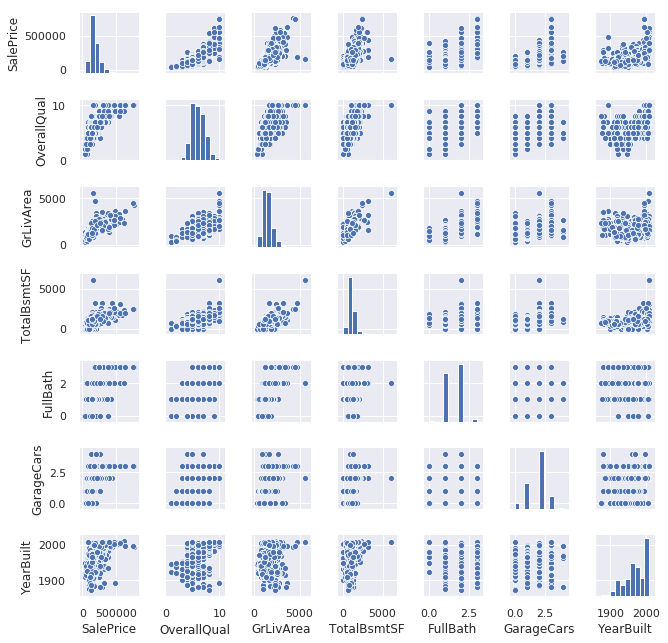

In [0]:
sns.set()
col = ['SalePrice', 'OverallQual', 'GrLivArea','TotalBsmtSF', 'FullBath', 'GarageCars','YearBuilt']
sns.pairplot(training[col], size = 1.3)
plt.show();

## 2.3 Skewness for Training Data

Identifying the skewness of the training data with SalePrice variable. It has right skewed that is required to transform the variable become normally distibuted.

Skewness: 1.882876


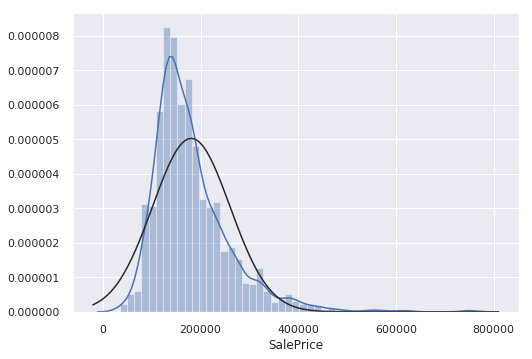

In [0]:

sns.distplot(training['SalePrice'], fit=norm);
print("Skewness: %f" % training['SalePrice'].skew())



Normalizing the target variable

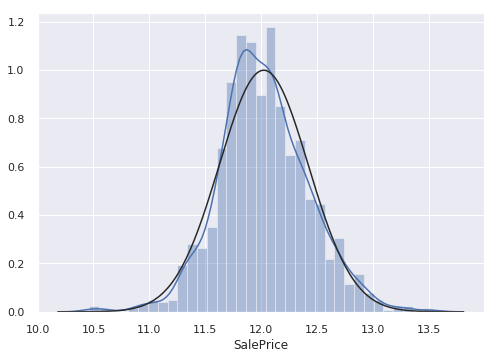

In [0]:
training["SalePrice"] = np.log1p(training["SalePrice"])
y=training["SalePrice"]

sns.distplot(training['SalePrice'],fit=norm);

 

## 2.4 Outliers for Training Data

Relation of the target variable with GrLivArea is also visualized as it is one of the highly correlated attributes. 

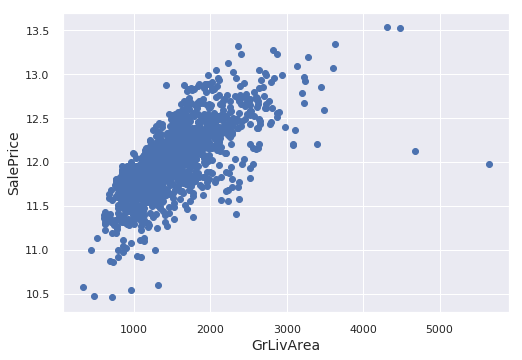

In [0]:
figure, scat = plt.subplots()
scat.scatter(x = training['GrLivArea'], y = training['SalePrice'])
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
plt.show()


Consequently, its outliers are omitted accordingly.

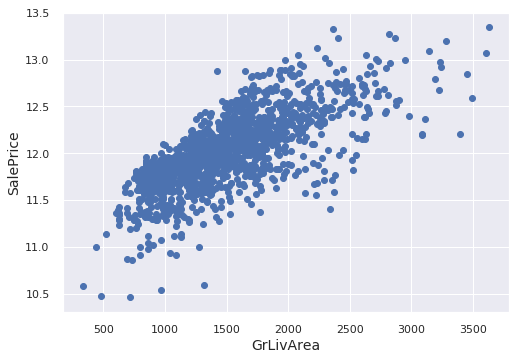

In [0]:
training = training.drop(training[(training['GrLivArea']>3900) & (training['SalePrice']<300000)].index)

figure, scat = plt.subplots()
scat.scatter(training['GrLivArea'], training['SalePrice'])
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
plt.show()

## **2.5 Correlation**

n order to better understand the relation of all attributes with each other and with target variable, correlation matrix is created to gather valuable insight based on correlation coefficients.

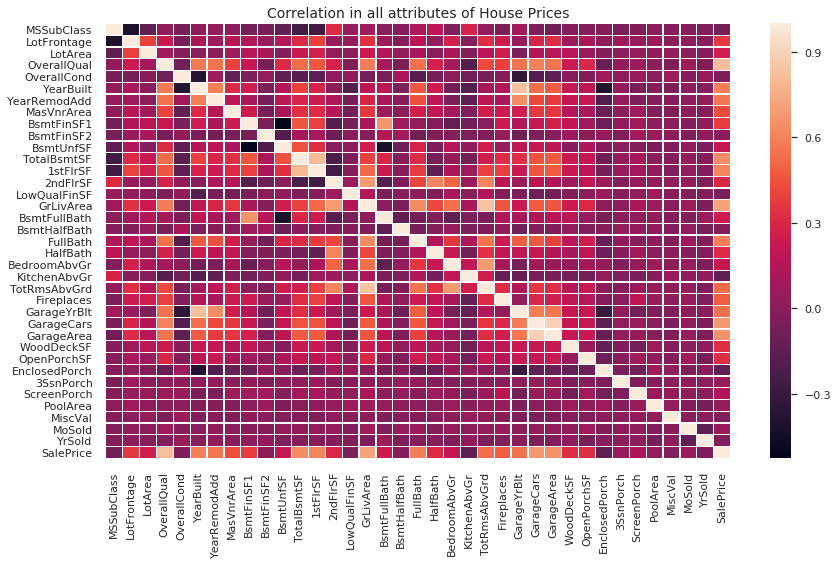

SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   -0.148636
Name: SalePrice, dtype: float64


In [0]:
corr = training.corr()
plt.figure(figsize=(14,8))
plt.title('Correlation in all attributes of House Prices', fontsize=14)
sns.heatmap(corr,annot=False,linewidths=0.2,annot_kws={'size':12})
plt.show()
print(corr["SalePrice"].sort_values(ascending=False))

In [0]:
total_dataset['MoSold'] = total_dataset['MoSold'].astype(str)
total_dataset['YrSold'] = total_dataset['YrSold'].astype(str)

total_dataset['MSSubClass'] = total_dataset['MSSubClass'].apply(str)

total_dataset['OverallCond'] = total_dataset['OverallCond'].astype(str)




Furthermore in our dataset, various categorical attributes have values that can be arranged in the order (example- fair, good, etc values in GarageCond, GarageQual), therefore LabelEncoder function is utilized that preserves the relation of values in attributes. Hence, it would guide the potential machine learning model to better understand the relation of values within attributes.

In [0]:
from sklearn.preprocessing import LabelEncoder
colms = ('ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'GarageFinish', 'LandSlope','BsmtFinType1',
         'Functional', 'Fence', 'BsmtExposure',
        'LotShape', 'FireplaceQu', 'BsmtQual', 
        'BsmtFinType2' , 'Street', 'Alley',
         'BsmtCond','PavedDrive','CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'GarageQual', 'GarageCond', 
        'ExterQual')
for col in colms:
    label = LabelEncoder() 
    label.fit(list(total_dataset[col].values)) 
    total_dataset[col] = label.transform(list(total_dataset[col].values))

 

## 2.6 Feature Engineering

*Additional* Feature creation (Data Acquisition)

Eventually, few important features are created to integrate interrelated attributes into their individual buckets like attributes related to surface area of house or attributes related to number of bathrooms into newly formed attribute. Therefore this method of combining related features into new features allows it to clearly identify the underlying structure of data and hence create an effective model.

In [0]:
total_dataset['Total_porch_sf'] = (total_dataset['OpenPorchSF'] + total_dataset['3SsnPorch'] +
                              total_dataset['EnclosedPorch'] + total_dataset['ScreenPorch'] +
                              total_dataset['WoodDeckSF'])

total_dataset["TotalBath"] = total_dataset["BsmtFullBath"] +total_dataset["FullBath"] + (0.5 * total_dataset["BsmtHalfBath"]) + (0.5 * total_dataset["HalfBath"])

total_dataset['TotalSF'] = total_dataset['TotalBsmtSF'] + total_dataset['1stFlrSF'] + total_dataset['2ndFlrSF']


 

In [0]:
total_dataset.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,...,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Total_porch_sf,TotalBath,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,3,0,PConc,2,6,548.0,2.0,5,2,5,Attchd,2003.0,1710,1,...,0,2Story,1,2,Lvl,0,8450,Inside,65.0,3,0,10,RL,196.0,BrkFace,None,0,4,CollgCr,61,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,8,856.0,0,2003,2003,2,61,3.5,2566.0
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,Feedr,Norm,SBrkr,0,4,3,MetalSd,MetalSd,4,5,1,CBlock,2,6,460.0,2.0,5,2,5,Attchd,1976.0,1262,0,...,0,1Story,1,3,Lvl,0,9600,FR2,80.0,3,0,5,RL,0.0,None,None,0,7,Veenker,0,7,6,2,0,3,CompShg,Gable,Normal,WD,0,1,6,1262.0,298,1976,1976,1,298,2.5,2524.0
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,608.0,2.0,5,2,5,Attchd,2001.0,1786,1,...,0,2Story,1,2,Lvl,0,11250,Inside,68.0,0,0,10,RL,162.0,BrkFace,None,0,11,CollgCr,42,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,6,920.0,0,2001,2002,2,42,3.5,2706.0
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,Norm,Norm,SBrkr,272,4,3,Wd Sdng,Wd Shng,4,2,1,BrkTil,1,6,642.0,3.0,5,3,5,Detchd,1998.0,1717,0,...,2,2Story,1,2,Lvl,0,9550,Corner,60.0,0,0,11,RL,0.0,None,None,0,4,Crawfor,35,4,7,2,0,3,CompShg,Gable,Abnorml,WD,0,1,7,756.0,0,1915,1970,0,307,2.0,2473.0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,836.0,3.0,5,2,5,Attchd,2000.0,2198,1,...,0,2Story,1,2,Lvl,0,14260,FR2,84.0,0,0,10,RL,350.0,BrkFace,None,0,3,NoRidge,84,4,8,2,0,3,CompShg,Gable,Normal,WD,0,1,9,1145.0,192,2000,2000,2,276,3.5,3343.0


Checking skewness of attributes

In [0]:
numeric_fts = total_dataset.dtypes[total_dataset.dtypes != "object"].index

skewed_fts = total_dataset[numeric_fts].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in  features: \n")
skewness = pd.DataFrame({'Skew' :skewed_fts})
skewness.head(12)


Skewness in  features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


Box Cox Transformation for skewed features



In [0]:
skewness = skewness[abs(skewness) > 0.70]
 
from scipy.special import boxcox1p
skewed_feat = skewness.index
lam = 0.15
for feat in skewed_feat:
     total_dataset[feat] = boxcox1p(total_dataset[feat], lam)

Those categorical attributes without any order in their data is converted to dummy variables by using get_dummies function.

In [0]:
#Creating a dummy of categorical feature
total_dataset = pd.get_dummies(total_dataset)
print(total_dataset.shape)
 

(2919, 223)


 Finally, the total concatenated dataset is divided into training dataset and testing dataset to feed into the models.

In [0]:
#divided the dataset into training and testing data
training = total_dataset[:ntrain]
testing = total_dataset[ntrain:]
training.shape

(1460, 223)

In [0]:
testing.shape

(1459, 223)

# 3. Methodology

In case of supervised learning and where the housing dataset is continuous, regression models are developed. As the number of features in dataset are already ready to build the predication models, necessary libraries are imported such as model, mathematical and plot libraries. Initially, the most basic linear progression model is utilized to predict the target variable values through the usage of multiple features. Its root mean square error (RMSE) is evaluated and residual plot is visualized to understand the efficiency of the model. But as the linear progression is prone to high biasness and variance and that can lead to imperfect model, therefore regularized machine learning model is also generated.

Ridge regression model is developed. This model is more effective as the model aims to minimize the loss function (RMSE in regression problem) more efficiently than the linear regression model. Additionally, its root mean square error (RMSE) is also evaluated and residual plot is visualized to understand the efficiency of the model. But in an attempt to minimize the loss function, this model reduces large B coefficients (values we wish to learn for prediction) by using lamda element but is unable to convert to zero. Therefore Lasso model is utilized which also follows the regularized linear progression but it overcomes the drawback of ridge model. It builds its model such that it could convert the irrelevant B coefficients to zero. Hence, it minimizes the loss function more effectively than the other models discussed. Furthermore, RMSE value is also evaluated for lasso model generated.



## 3.1 Linear Progression

0.840373019192594 0.8030304105214111


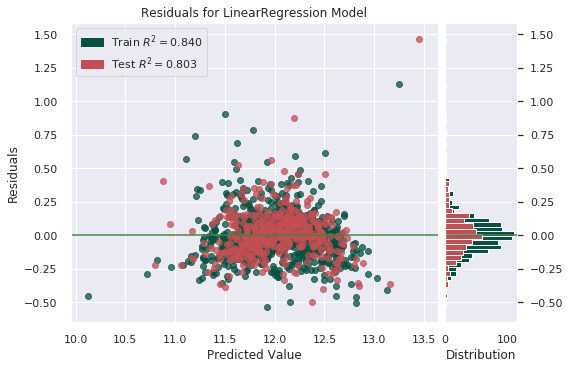

In [0]:
#Partitioning training data into 70% for train and 30% for test to validate the model
X = training[['OverallQual','GrLivArea','GarageCars', 'TotalSF', 'TotalBath', 'YearBuilt']].values
X_LRtrain, X_LRtest, y_LRtrain, y_LRtest = train_test_split(X, y, train_size=0.7)

#implementing the Linear Algorithm
LRmodel = LinearRegression()  
LRmodel.fit(X_LRtrain, y_LRtrain)
print (LRmodel.score( X_LRtrain, y_LRtrain ) , LRmodel.score( X_LRtest , y_LRtest ))

visualLR = ResidualsPlot(LRmodel, train_color='#045342', test_color='r', line_color='#428342')
visualLR.fit(X_LRtrain, y_LRtrain )  # Fit the training data to the visualizer
visualLR.score( X_LRtest,  y_LRtest)
gLR = visualLR.poof(outpath="residual_plot")



In [0]:
n_folds = 4

def rms_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=38).get_n_splits(features) 
    rms= np.sqrt(-cross_val_score(model, features, labels, cv = kf))
    return(rms.mean())

In [0]:
y_predLR = LRmodel.predict(X_LRtest)

rmsle_cv(LRmodel, X_LRtest, y_LRtest)
 

0.17678671856896977

## 3.2 Ridge Regression

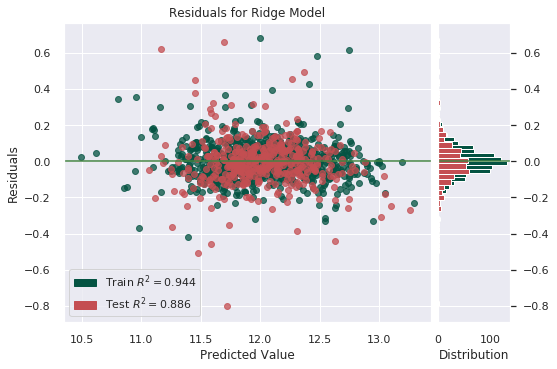

In [0]:
#Partitioning training data into 70% for train and 30% for test to validate the model
train_X , valid_X , train_y , valid_y = train_test_split(training, y, train_size = .7)

#implementing the Ridge Algorithm
RRmodel = Ridge()
visualRR = ResidualsPlot(RRmodel, train_color='#045342', test_color='r', line_color='#428342')
visualRR.fit(train_X, train_y)  # Fit the training data to the visualizer
visualRR.score(valid_X, valid_y)
gRR = visualRR.poof(outpath="residual_plot")

In [0]:
y_predRR = RRmodel.predict(valid_X)
rmsle_cv(RRmodel, valid_X, valid_y)

0.14509221970176217

## 3.3 Lasso Regression

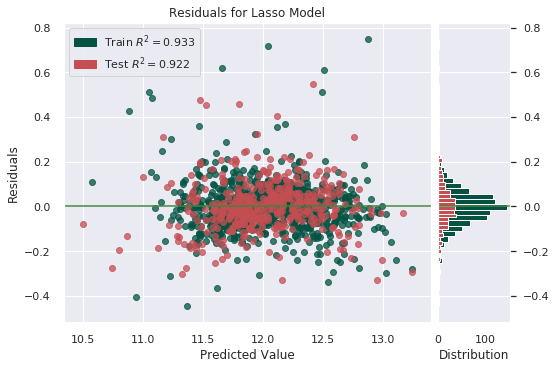

In [0]:
#Partitioning training data into 70% for train and 30% for test to validate the model
LaPtrain_X , LaPvalid_X , LaPtrain_y , LaPvalid_y = train_test_split(training, y, train_size = .7)

#implementing Lasso  Algorithm
las = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

visualLaP = ResidualsPlot(las, train_color='#045342', test_color='r', line_color='#428342')
visualLaP.fit(LaPtrain_X, LaPtrain_y)  # Fit the training data to the visualizer
visualLaP.score(LaPvalid_X, LaPvalid_y)
gLaP = visualLaP.poof(outpath="residual_plot")

In [0]:
#measuring the accuracy of varibles
y_predLaP = las.predict(LaPvalid_X)
rmsle_cv(lasso, LaPvalid_X, LaPvalid_y)

0.128722483758734

# 4.Evaluation

To build the models, training dataset is divided into 30% of testing data and 70% of training data. In linear regression top 6 features are selected for creation of linear regression model as these features have high correlation coefficients with Saleprice target variable.  Thereafter, the residual plot is created to get a better understanding of the variability of the model’s predicted values with the actual values. RMSE values for this model is 0.18 and score is 81.9, which as anticipated is not an efficient model.

In ridge regression model, all of the attributes are taken in training data for building the model. Its residual plot is also created which shows less variability of the predicted values with the actual values. Hence it demonstrated to be a better model than linear regression. Its RMSE is 0.134 and score is 90.1 which substantiates the result of residual plot. At last, Lasso model is also built whose RMSE value is 0.12 which is the minimum of all the other discussed model. Hence, this model predicts the target variable more accurately than latter models.


# 5. Conclusion

We use three different regression algorithms to build the best model for predicting the house prices in Ames, Lowa. This report incorporates new features like TotalSF, TotalBath, etc and also addresses the most important statistical attributes that are overall quality, above grade living area, garage size of car capacity, and the square of basement area. Using these attributes, it can be seen that the accuracy score changes using three different methods. The RMSE value of Ridge (14%) and Lasso Regression (12%) demonstrate that their models are efficient than Linear Regression (17%). With regard to the diverse and interdependency of the variables, Linear Regression is less likely to handle noisy data. In the future, it would be great if this prediction can be implemented in the regions where is near to Ames, Lowa.

# 6. Ethical

The job position as a sales price forecaster may be in demand in the workplace, as it influences strategic decisions for business to achieve goals. However, the decisions of a forecaster are unlikely to be steadfast in very situations as the predictions can be inaccurate due to certain external factors. Assume he works at a housing agent in which they predict the house prices. 

He feels confident with the result that the house prices will increase about 10% over this year. The manager uses the prediction to hire more salespeople. Unpredictably the market shows house prices decreasing because of the long drought in this area due to climate change. As a result, based on his prediction, the housing agent loses much money. This might affect the company’s prosperity and jeopardize his position. In this sense, he assumed that he just identify based on the data without considering the external factors. In general, even the house price forecast to increase every year, there are possible external factors outside the data that should be taken into account before believing the data result. Furthermore, the prediction requires to be validated by conducting user research to assure that the accuracy relevant to the market. Therefore, the right strategy can be decided in order to increase the house sales. 
